# Tasks

## Table of content

- [Task 1](#task-1-ipynb)
- [Task 2](#task-2-ipynb)
- [Task 4](#task-4-ipynb)


## Task 1<a id="task-1-ipynb">


### method 1


1. open the video in the browser
2. click on the share button
3. click on the embed option
4. copy the iframe code that appears inside box
5. open a jupyter code cell
6. type `%%HTML` then paste in the new line the embed code


In [2]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/7BXJIjfJCsA?si=9ZvvG8SRKlW8mCxD" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

##


### method 2


- Copy the video ID located inside the URL in the following cell
- The ID can be found inside the link, for example [https://www.youtube.com/watch?v=7BXJIjfJCsA](https://www.youtube.com/watch?v=7BXJIjfJCsA) has the ID `7BXJIjfJCsA`


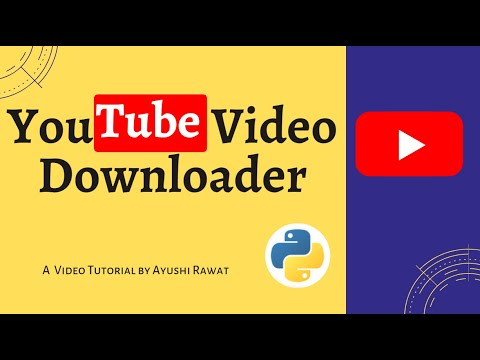

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo("7BXJIjfJCsA")

# Task 2<a id="task-2-ipynb">


In [9]:
from bs4 import BeautifulSoup
import requests
from PIL import Image

# connect to the website and get the website html
url = "http://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "lxml")

# get the link of the image of the first book
image_src = soup.ol.li.article.div.a.img.get("src")
image_link = url + image_src

# get the image from the url and save it
img = Image.open(requests.get(image_link, stream=True).raw)
img.save("book-1.png")

## Task 4<a id="task-4-ipynb">


In [3]:
# A Webdriver Manager package for Python (uncomment the 4th line to install it)
# More info could be found here: https://pypi.org/project/webdriver-manager/

#!pip install webdriver-manager

#!pip install selenium

In [31]:
username = "USERNAME"
password = "PASSWORD"

In [32]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver.maximize_window()

# wait for 60 seconds to locate any of the elements in
# the following instructions before throwing an error
driver.implicitly_wait(60)

# go to GitHub sign-in page
driver.get("https://github.com/")
driver.find_element(
    By.XPATH, "/html/body/div[1]/div[1]/header/div/div[2]/div/div/div/a"
).click()

driver.find_element(By.ID, "login_field").send_keys(username)
driver.find_element(By.ID, "password").send_keys(password)
driver.find_element(By.XPATH, '//*[@id="login"]/div[4]/form/div/input[13]').click()

In [33]:
# close the webdriver and the opened window
driver.quit()